# MuML Labor 3 - Machine Learning (Classic)


## 5.4.1 Teilaufgabe Merkmalsextraktion

Anwendung der Vorverarbeitungsschritte aus Labor 1 und der Merkmalsextraktion aus Labor 2.

Nachfolgend werden die Schritte aus Labor 1 und Labor 2 zusammengefasst. Um eine vergleichbare Ausgangssituation zu schaffen, werden die folgenden Merkmale extrahiert und in einem Pandas-Dataframe zurückgegeben und in der Tabelle ```features.csv``` gespeichert:

- img:  Index des Bildes ohne 000_OK.jpg, begonnen bei 0
- file: Dateiname des Bildes
- segment: fortlaufender Index des Segments,  beginnend bei 0
- x, y, w, h: Koordinaten der Bounding Box des Segments
- area: Fläche
- hull_area: Fläche der konvexen Hülle
- roundness: Rundheit
- density: Dichte
- eccentricity: Exzentrizität
- orientation: Winkel in Grad im Bereich -90 ... +90 Grad
- center_x, center_y: Schwerpunkt des Segments
- mean: Mittelwert
- std: Standardabweichung
- class: Feld für Label, derzeit noch nicht bekannt

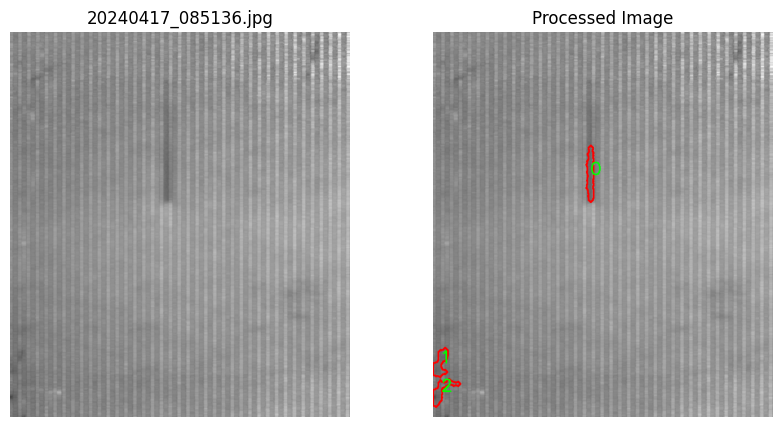

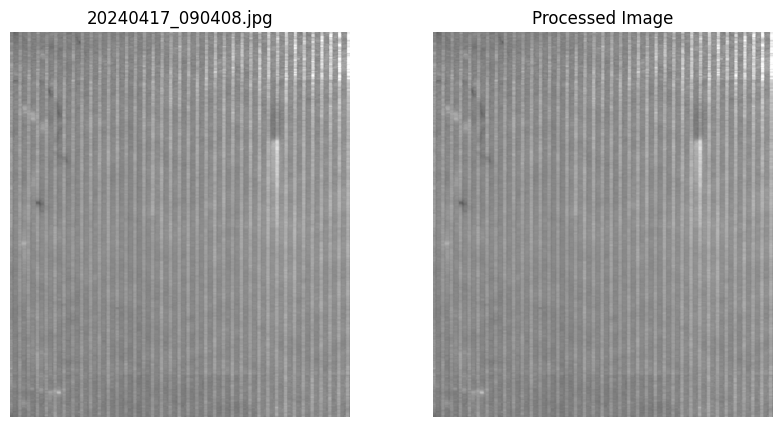

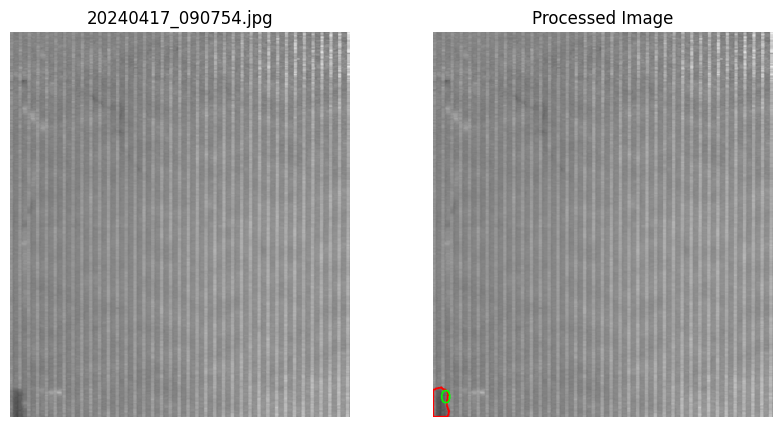

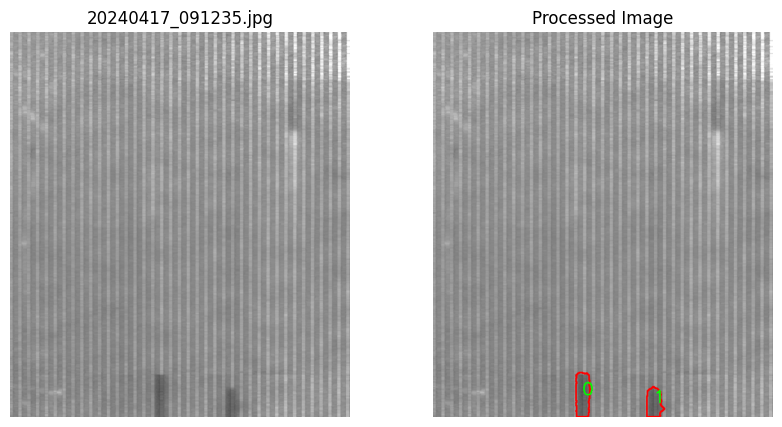

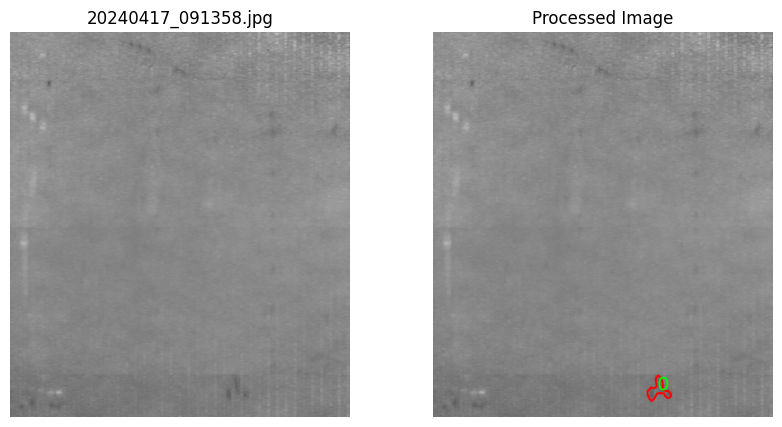

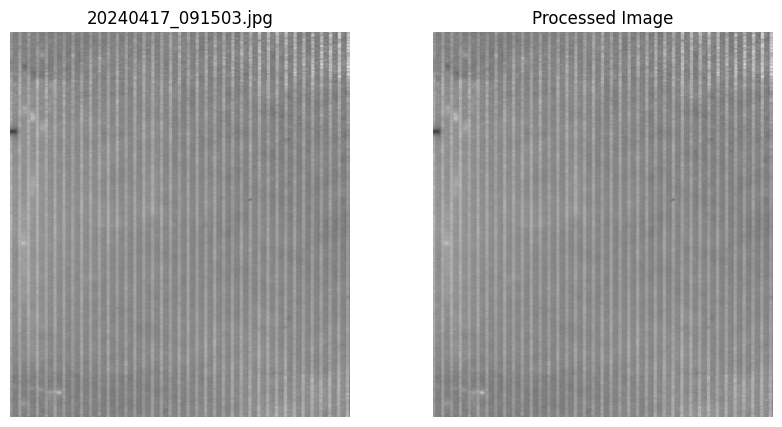

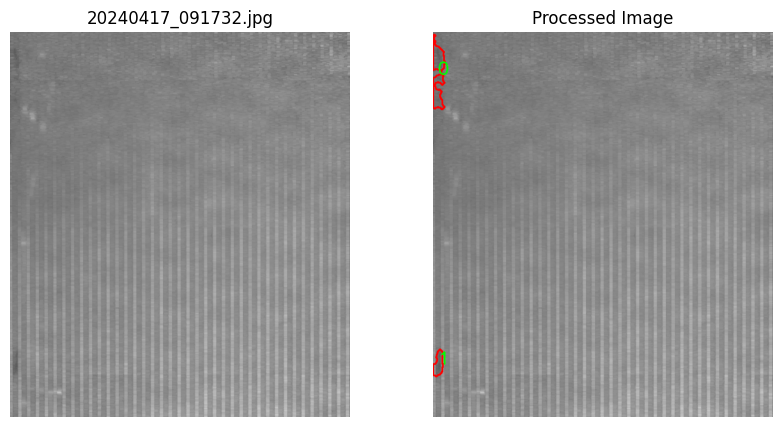

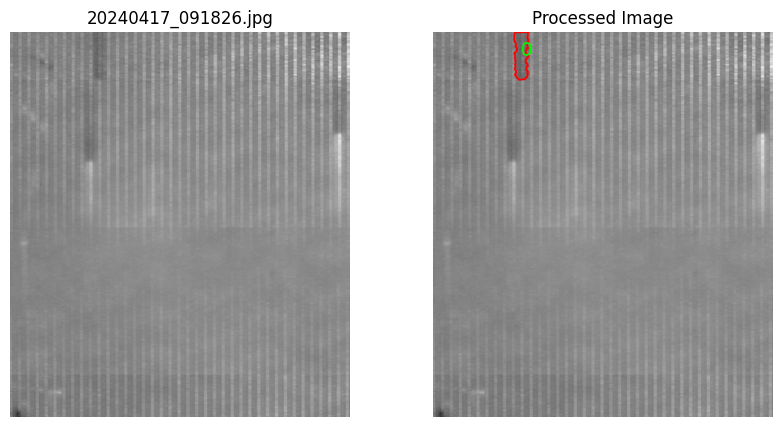

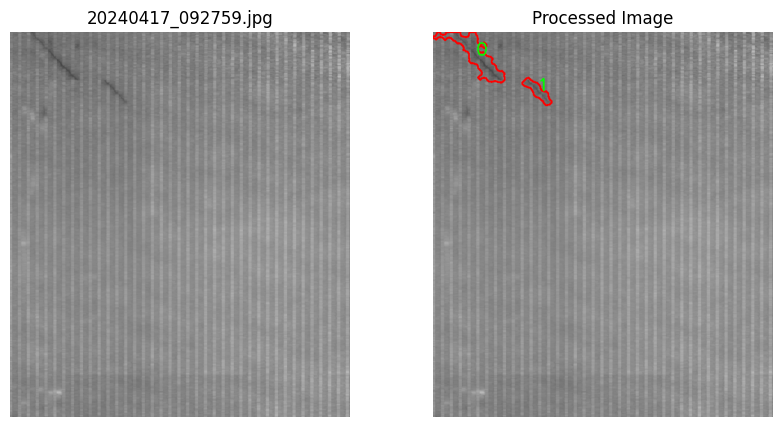

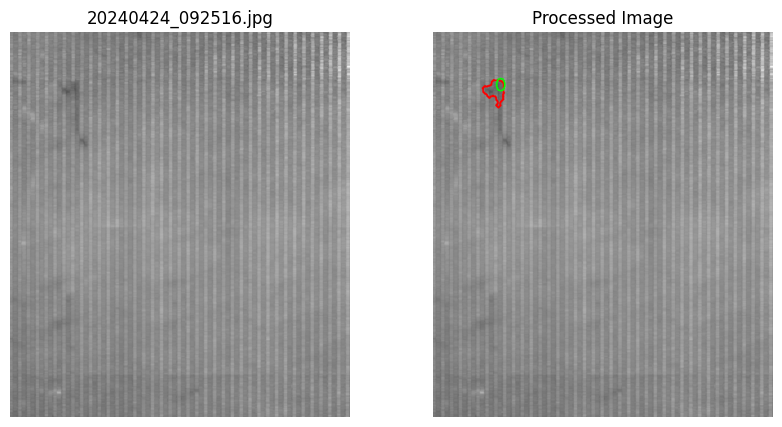

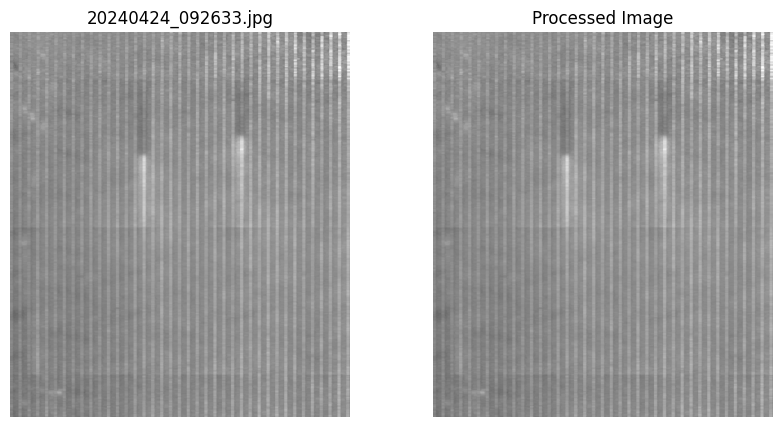

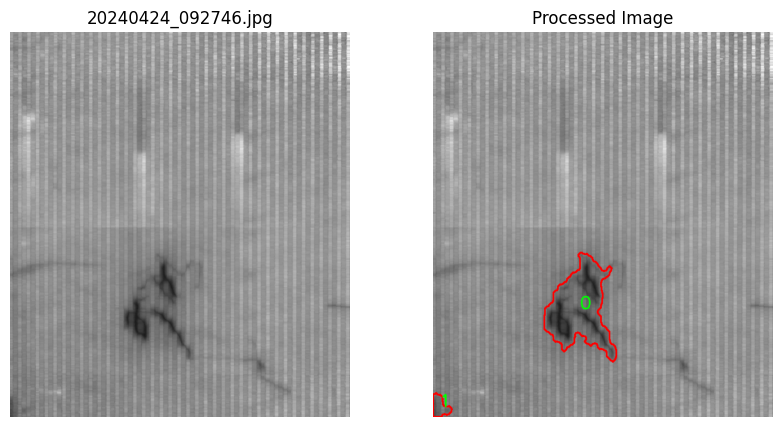

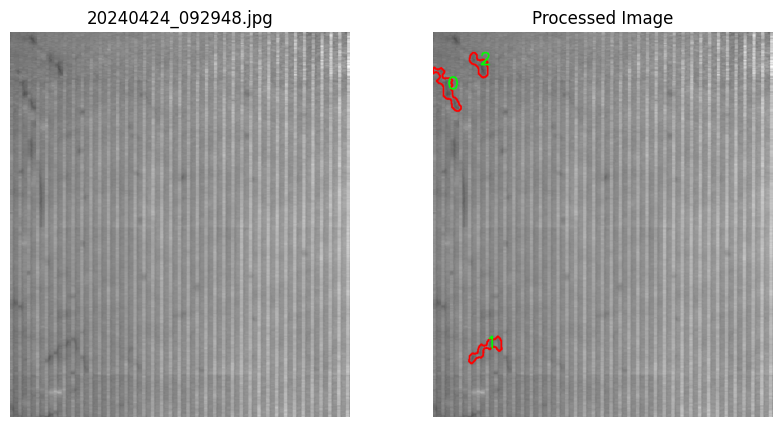

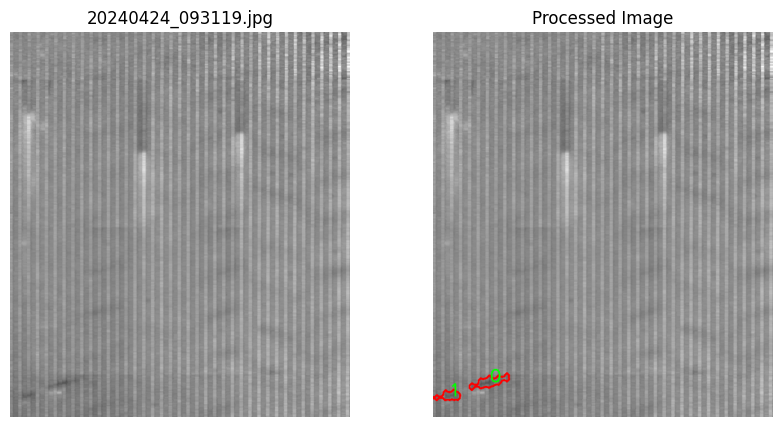

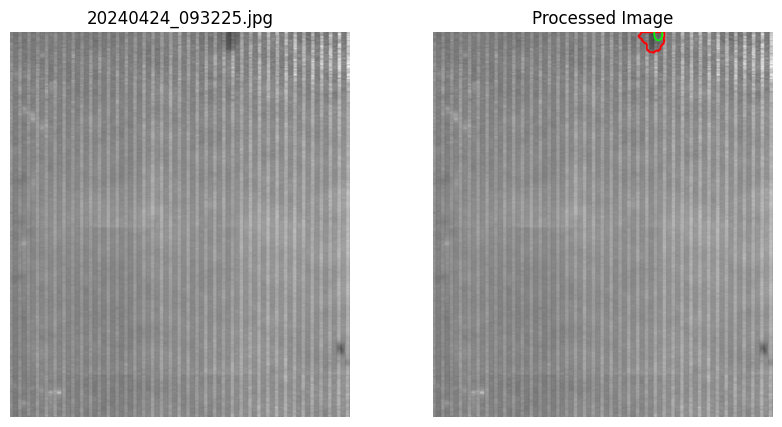

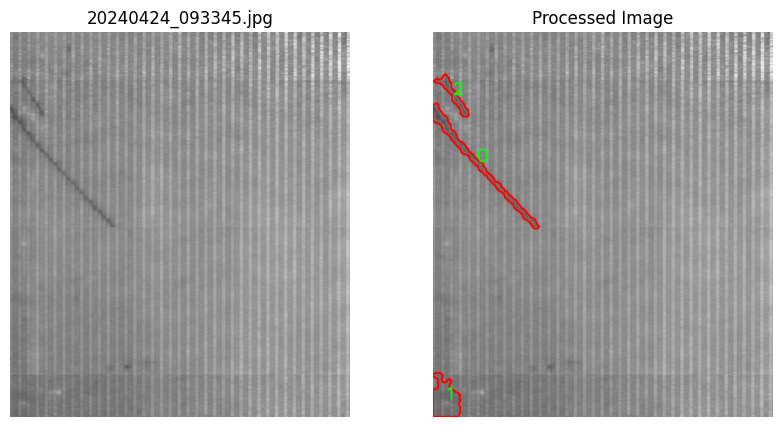

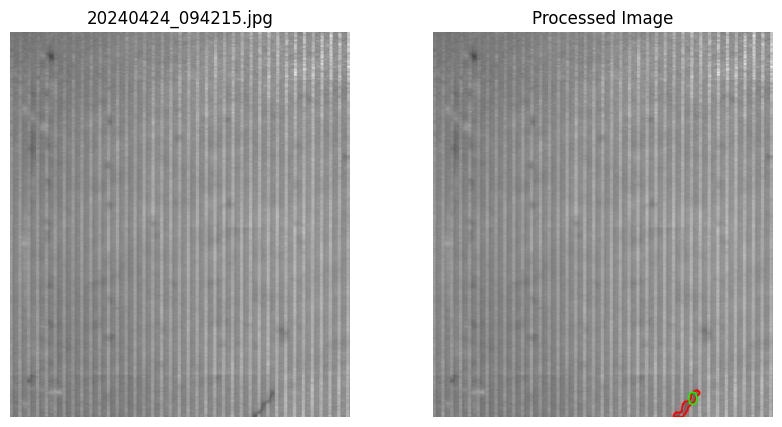

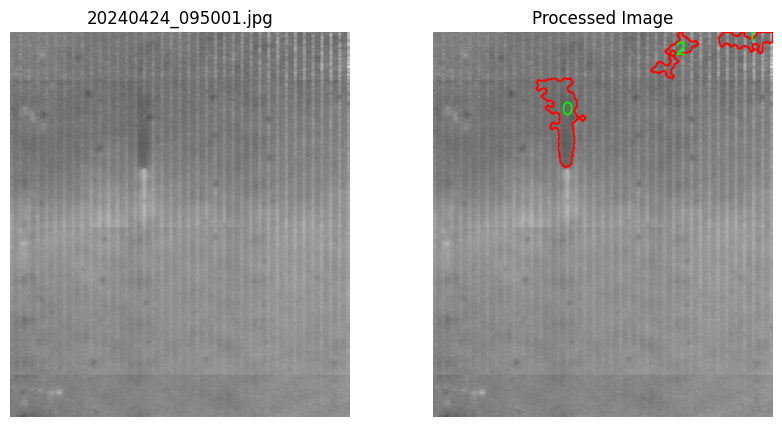

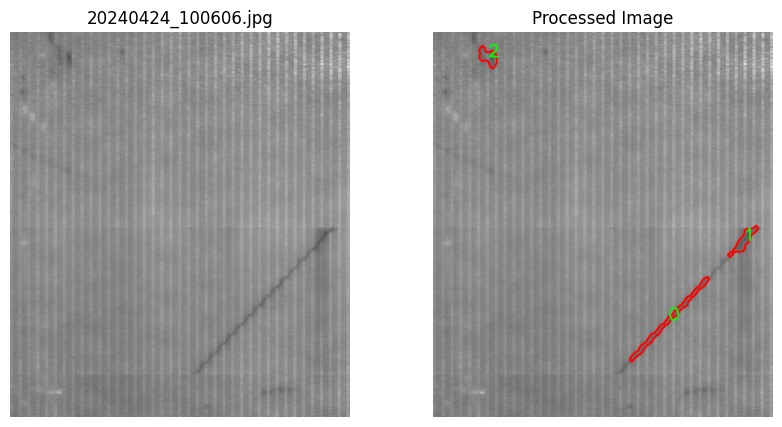

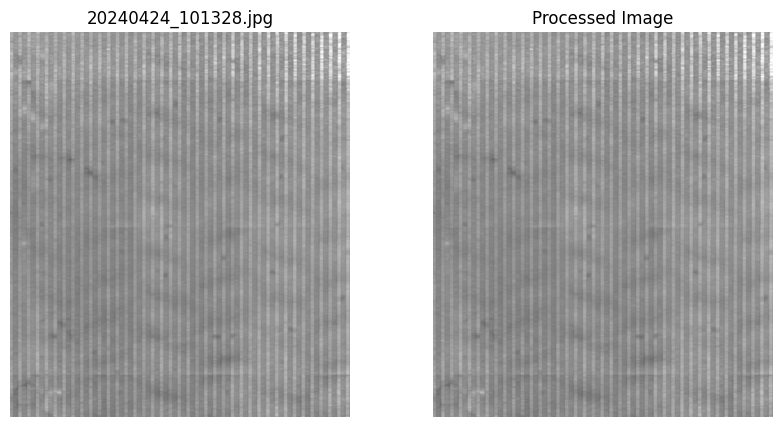

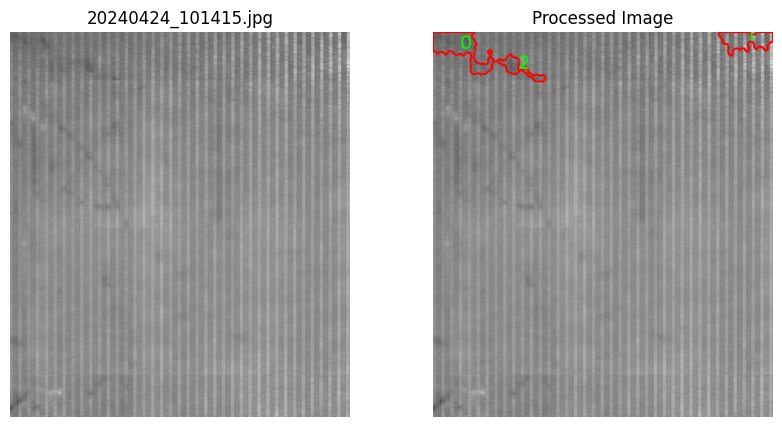

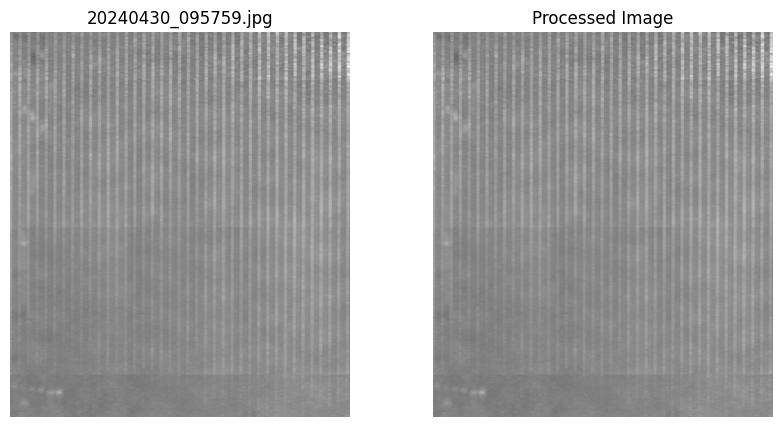

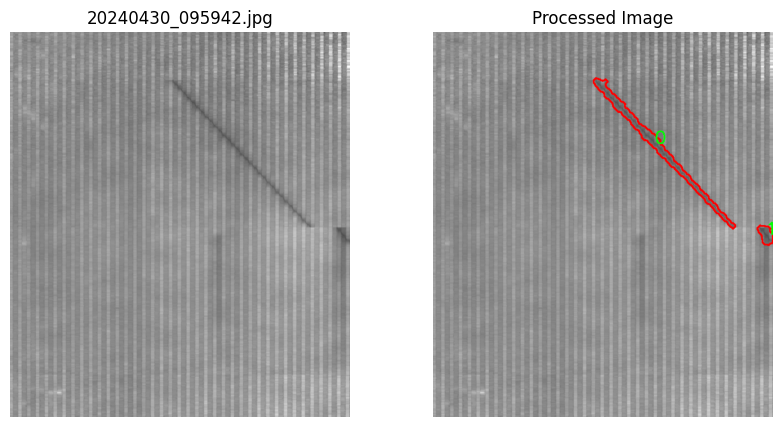

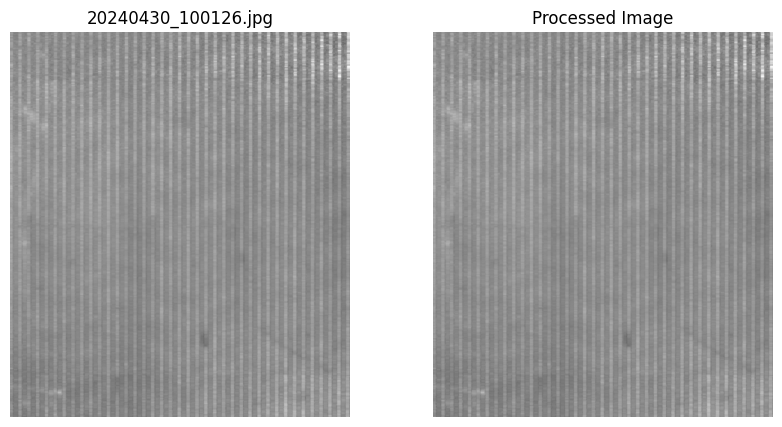

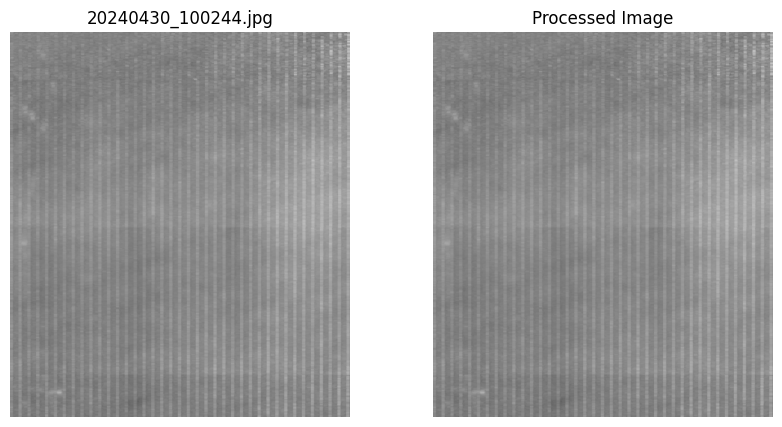

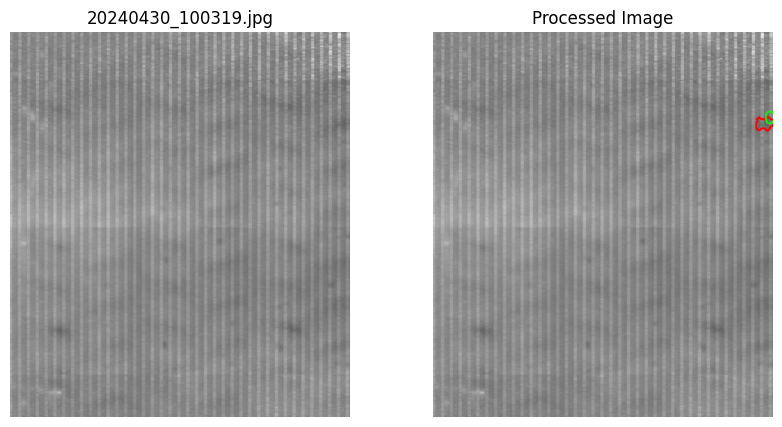

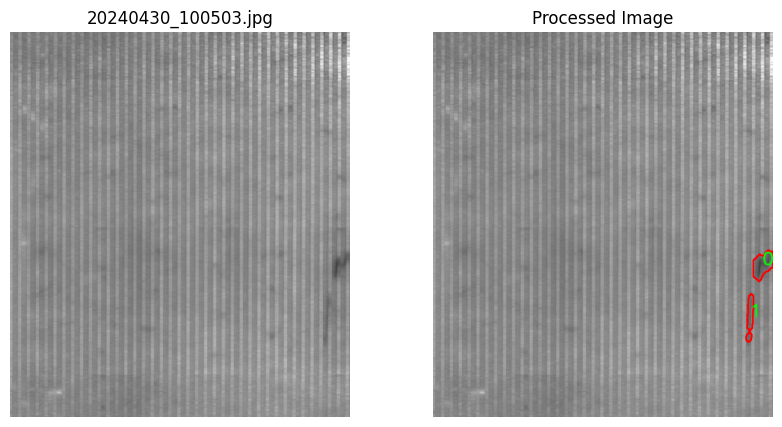

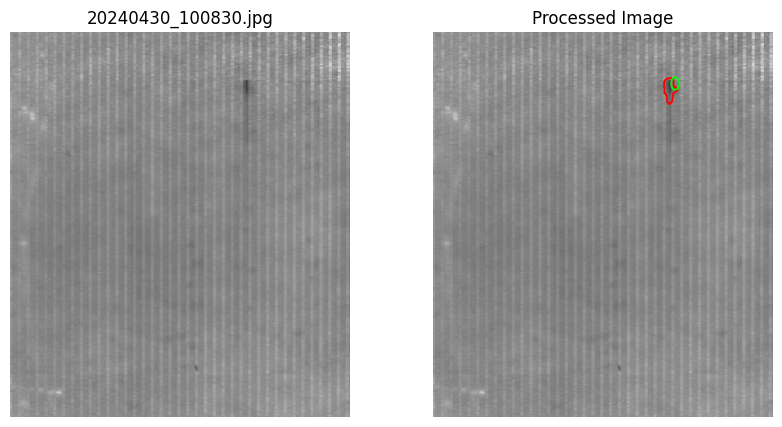

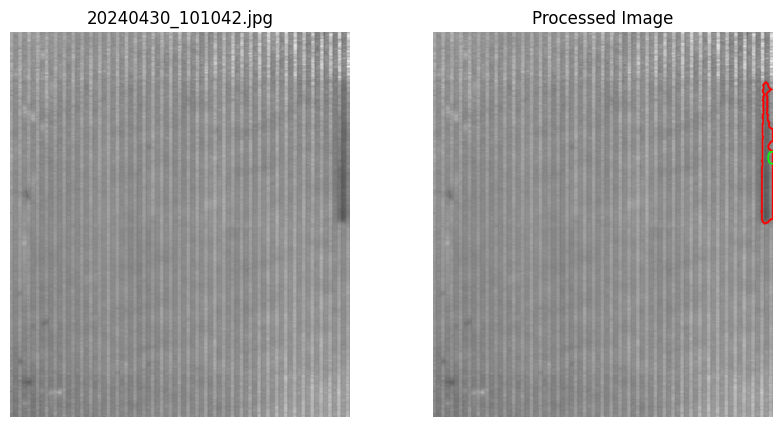

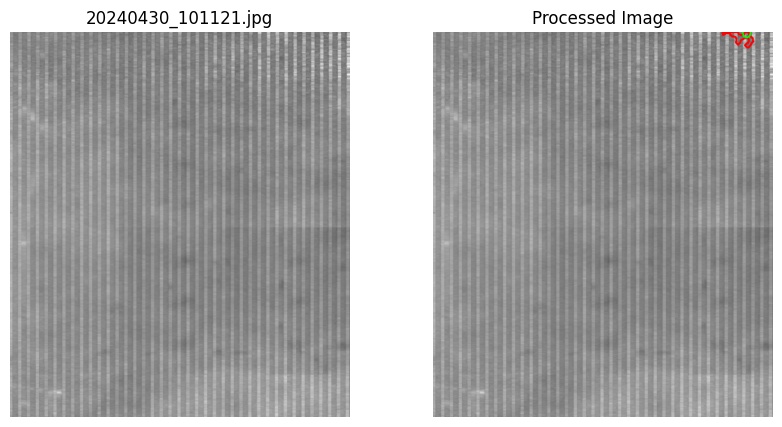

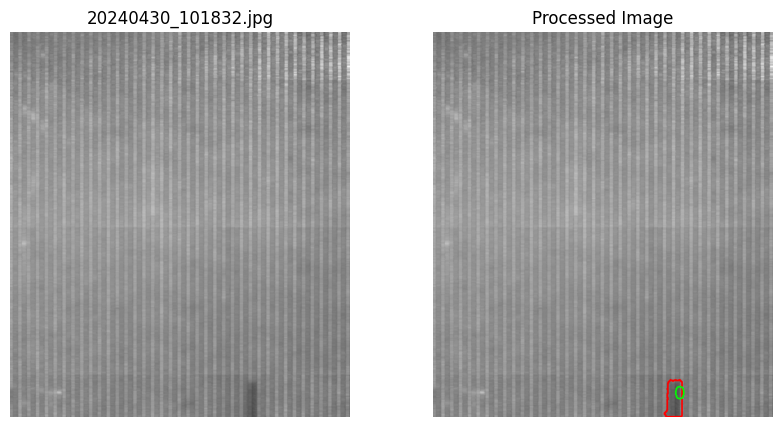

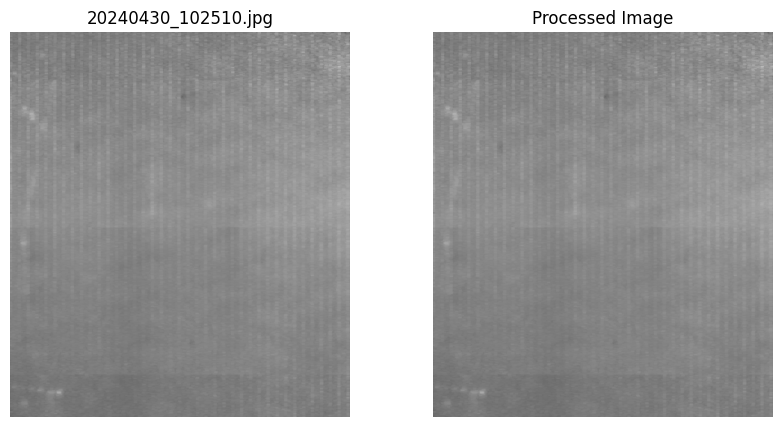

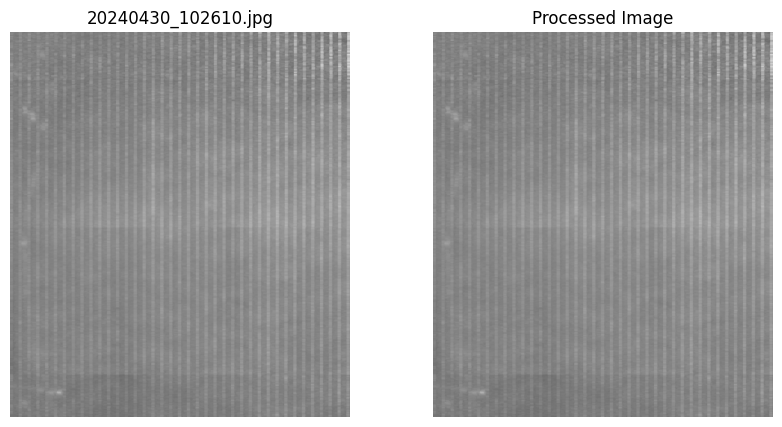

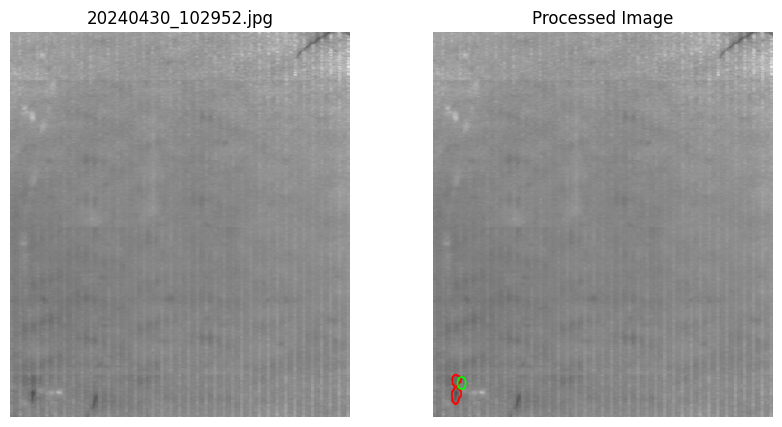

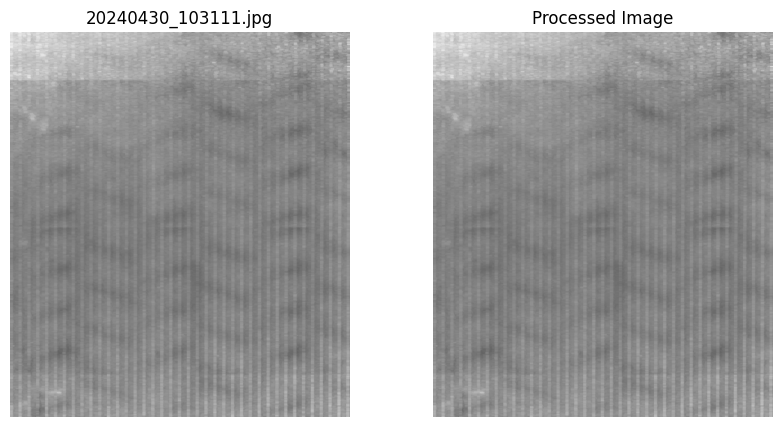

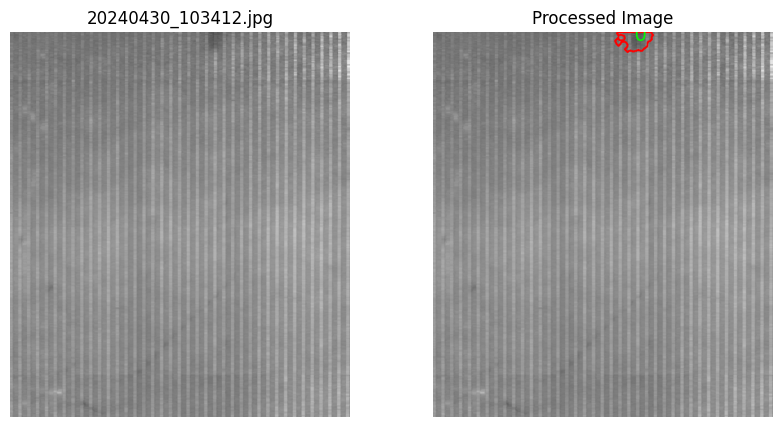

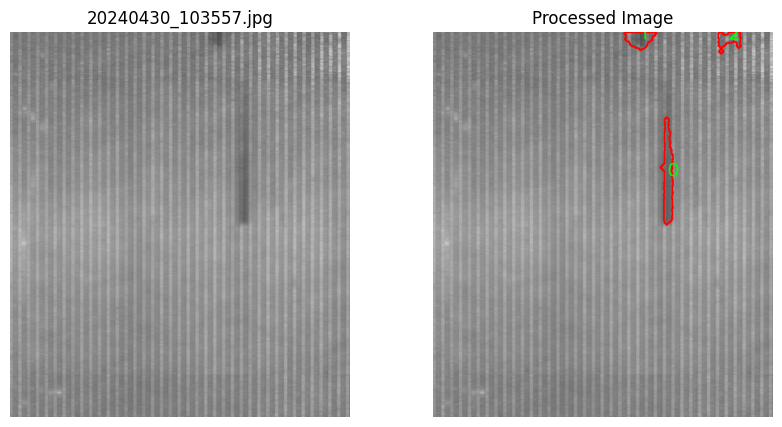

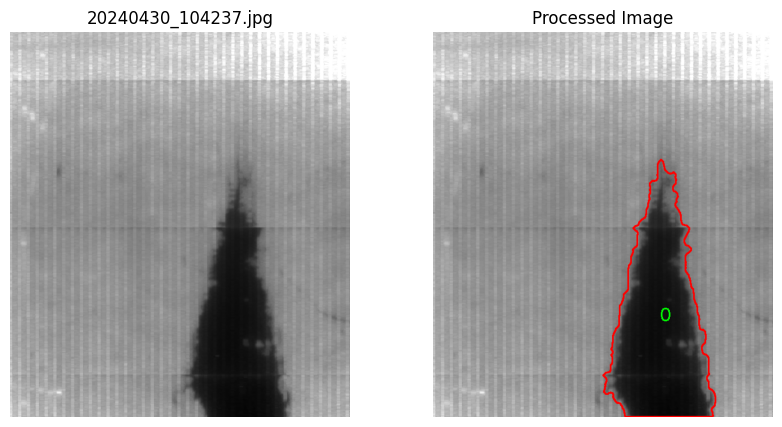

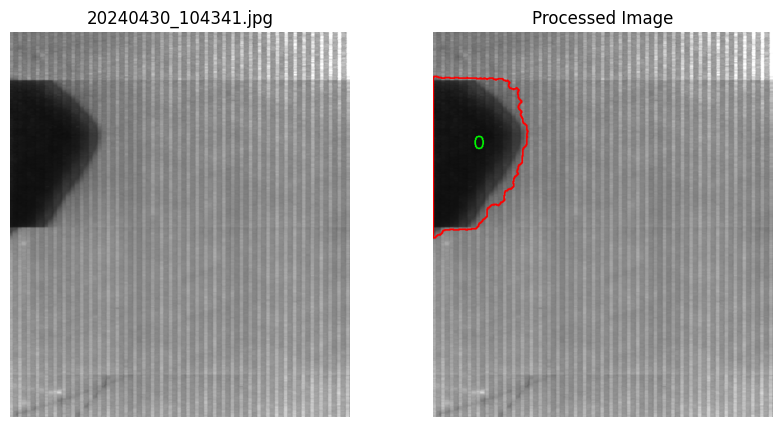

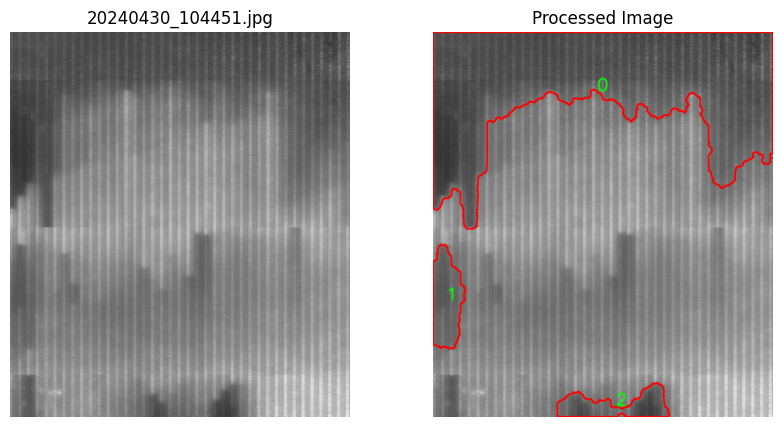

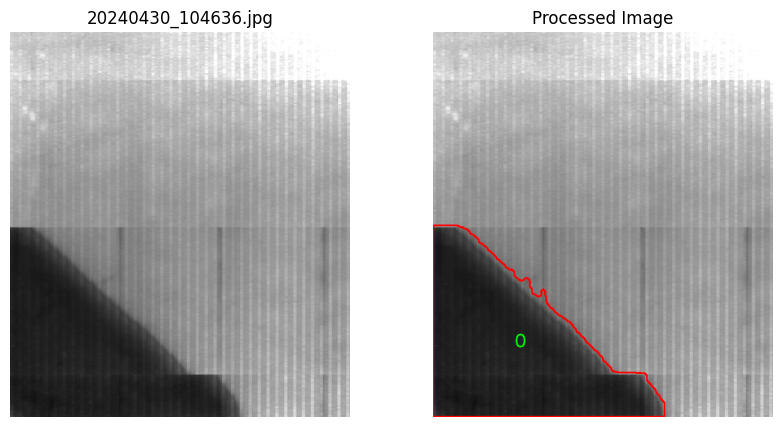

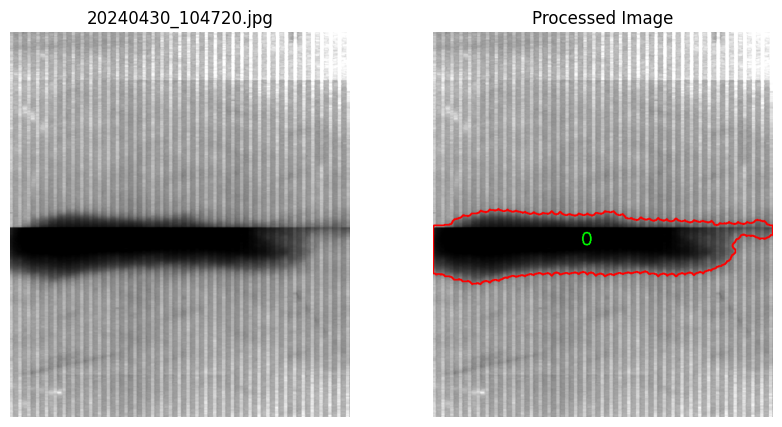

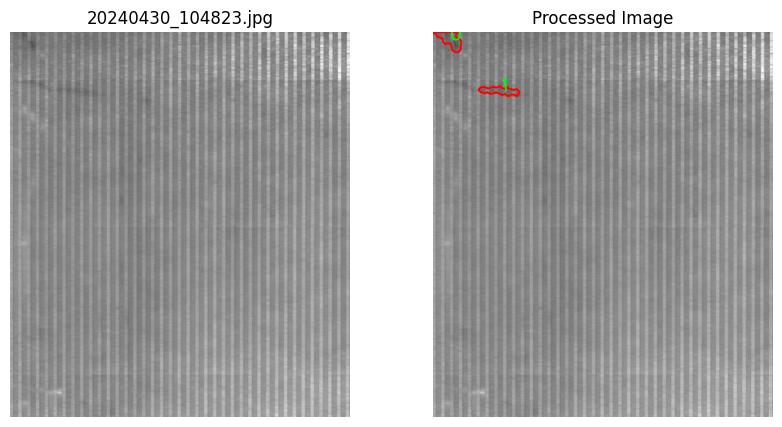

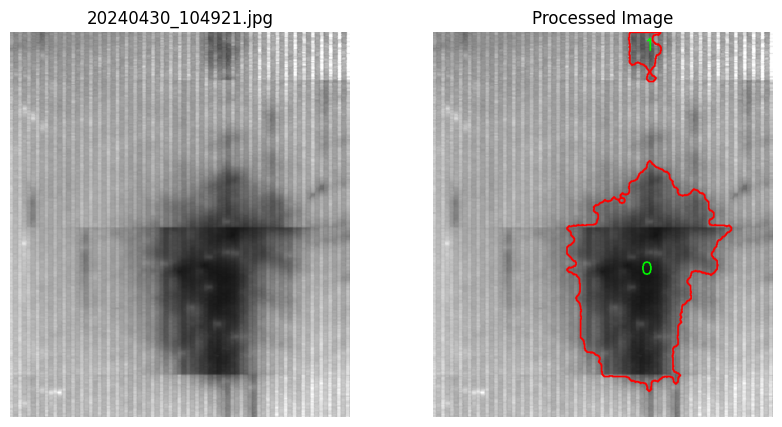

img                 file  segment    x    y    w    h      area  \
0     0  20240417_085136.jpg        0  270  200   14  101     956.0   
1     0  20240417_085136.jpg        1    0  557   27   54     769.0   
2     0  20240417_085136.jpg        2    0  612   49   51     747.0   
3     2  20240417_090754.jpg        0    0  627   29   53    1244.5   
4     3  20240417_091235.jpg        0  252  601   26   79    1743.5   
5     3  20240417_091235.jpg        1  377  626   32   54    1217.0   
6     4  20240417_091358.jpg        0  378  606   43   46     726.5   
7     6  20240417_091732.jpg        0    0    4   22  133    1561.0   
8     6  20240417_091732.jpg        1    0  560   18   49     539.5   
9     7  20240417_091826.jpg        0  143    0   26   85    1708.0   
10    8  20240417_092759.jpg        0    0    0  127   90    3321.5   
11    8  20240417_092759.jpg        1  157   80   53   50     899.5   
12    9  20240424_092516.jpg        0   87   84   39   50     973.0   
13   11  20240424_092746.jpg        0  196  389  128  194   12756.0   
14   11  20240424_092746.jpg        1    0  637   34   43     852.5   
15   12  20240424_092948.jpg        0    0   62   50   78    1104.0   
16   12  20240424_092948.jpg        1   63  537   59   49     846.0   
17   12  20240424_092948.jpg        2   64   36   33   45     706.0   
18   13  20240424_093119.jpg        0   64  602   71   31     840.0   
19   13  20240424_093119.jpg        1    0  631   49   20     501.0   
20   14  20240424_093225.jpg        0  362    0   47   37    1141.0   
21   15  20240424_093345.jpg        0    0  125  188  223    2893.0   
22   15  20240424_093345.jpg        1    0  601   49   79    2681.5   
23   15  20240424_093345.jpg        2    0   74   64   77    1025.5   
24   16  20240424_094215.jpg        0  424  632   47   48     557.5   
25   17  20240424_095001.jpg        0  182   81   87  159    5562.0   
26   17  20240424_095001.jpg        1  503    0   97   38    1993.5   
27   17  20240424_095001.jpg        2  384    0   85   83    1813.5   
28   18  20240424_100606.jpg        0  347  432  141  150    1351.0   
29   18  20240424_100606.jpg        1  520  342   55   56     780.0   
30   18  20240424_100606.jpg        2   81   24   32   41     678.0   
31   20  20240424_101415.jpg        0    0    0  110   76    3550.5   
32   20  20240424_101415.jpg        1  503    0   97   43    2410.5   
33   20  20240424_101415.jpg        2  111   38   88   51    1105.0   
34   22  20240430_095942.jpg        0  283   81  251  267    4164.5   
35   22  20240430_095942.jpg        1  572  341   28   36     623.5   
36   25  20240430_100319.jpg        0  570  149   30   26     521.0   
37   26  20240430_100503.jpg        0  565  385   35   56    1220.5   
38   26  20240430_100503.jpg        1  552  462   14   86     664.5   
39   27  20240430_100830.jpg        0  407   81   25   47     640.0   
40   28  20240430_101042.jpg        0  579   88   21  251    3621.0   
41   29  20240430_101121.jpg        0  510    0   56   28     526.0   
42   30  20240430_101832.jpg        0  408  614   32   66    1661.5   
43   33  20240430_102952.jpg        0   33  605   17   53     579.5   
44   35  20240430_103412.jpg        0  321    0   68   36    1526.0   
45   36  20240430_103557.jpg        0  401  150   23  191    2354.5   
46   36  20240430_103557.jpg        1  337    0   58   33    1146.0   
47   36  20240430_103557.jpg        2  503    0   41   39     836.5   
48   37  20240430_104237.jpg        0  300  225  199  455   51675.0   
49   38  20240430_104341.jpg        0    0   78  168  286   37451.5   
50   39  20240430_104451.jpg        0    0    0  600  348  106830.0   
51   39  20240430_104451.jpg        1    0  375   58  185    7655.5   
52   39  20240430_104451.jpg        2  219  619  199   61    6509.0   
53   40  20240430_104636.jpg        0    0  341  409  339   80456.5   
54   41  20240430_104720.jpg        0    0  312  600  134   55688.5   
55   42  20240430_104823.jpg

Elapsed time: 7.09 seconds
Features saved to ..\labdata\lab3_cells\features.csv
Number of images: 34
Number of segments: 59


In [5]:
""" Feature extraction for solar cell images
    - preprocessing with shading correction
    - segmentation with fixed thresholding
    - contour finding
    - feature extraction
    - save features to a csv file

    @Author: Joerg Dahlkemper
    @Date: 2024-05-18
"""

import os
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import time
import timeit


IMAGE_PATH = "..\\labdata\\lab3_cells"         # path to the images
LIMITS = [70, 100, 900, 700]    # limits to eliminate black borders
BAR_HEIGHT = 50                 # height of the busbars
BAR_POSITIONS = [85, 395, 705]  # positions of the busbars
REF_IMG = "ref.jpg"             # reference image for shading correction
THRESH = 105                    # threshold for fixed thresholding 116
MAX_NUM_CNT = 3                 # maximum number of contours
MIN_AREA = 500                  # minimum area of a contour
RESULT_FILE = "features.csv"    # file to save the features


def get_roi(img, row1, col1, row2, col2):
    """ eliminate black borders and diagonal edges from the image"""
    return img[row1:row2, col1:col2]


def discard_busbars(img, bar_height, positions):
    """ discard busbars from the image"""
    height, width = img.shape
    count_bars = len(positions)
    img_discarded_bars = img.copy()
    # apply numpy delete in a loop to remove the busbars
    for step, position in enumerate(positions):
        img_discarded_bars = np.delete(img_discarded_bars, 
            np.arange(position - step * bar_height, position + (1 - step) * bar_height), axis=0)
    return img_discarded_bars


def contrast_stretching(img):
    """ apply contrast stretching to the image"""
    img = img.astype(np.float32)
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    stretched[stretched < 0] = 0
    stretched[stretched > 255] = 255
    return stretched.astype(np.uint8)

def smoothing(img, kernel_size):
    """ apply a Gauss filter to the image"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def shading_correction(img, ref_image):
    """ apply shading correction to the image"""
    img_filtered = cv2.GaussianBlur(img, (3, 3), 0).astype(np.float32)
    ref_image_filtered = cv2.GaussianBlur(ref_image, (3, 3), 0).astype(np.float32)
    # shading correction
    img_shading_corrected = cv2.divide(img_filtered, ref_image_filtered, scale=128)
    # normalize the image so that median is 128
    median = np.median(img) - 128
    img_normalized = img_shading_corrected - median
    img_normalized[img_normalized < 0] = 0
    img_normalized[img_normalized > 255] = 255
    img_normalized = img_normalized.astype(np.uint8)
    # maximum filter to eliminate fingers
    img_normalized = cv2.dilate(img_normalized, np.ones((1, 5), np.uint8))
    return img_normalized

def preprocess(img):
    """ apply all preprocessing steps to the image"""
    img = get_roi(img, *LIMITS)
    img = discard_busbars(img, BAR_HEIGHT, BAR_POSITIONS)
    img = contrast_stretching(img)
    return img

def morph(img):
    """morph with diagonal lines"""
    strel1 = np.eye(5, 5, dtype=np.uint8)
    strel2 = strel1.copy()[::-1, :]
    strel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

    img_morph = cv2.morphologyEx(img, cv2.MORPH_DILATE, strel1)
    img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_DILATE, strel2)
    img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, strel3)
    
    return img_morph

def segmentation(img, thresh):
    """segmentation of the image"""
    # fixed thresholding
    _, img_seg = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)
    # morph with diagonal lines
    img_seg = morph(img_seg)
    return img_seg

# contour finding
def find_contours(img, max_num_cnt, min_area):
    """ find contours in the image"""
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # sort contours by area
    contours_filtered = [contour for contour in contours if cv2.contourArea(contour) > min_area]
    contours_sorted = sorted(contours_filtered, key=cv2.contourArea, reverse=True)[:max_num_cnt]
    return contours_sorted

def compute_features(contours, img_gray):
    """ contours_list contains a list of contours of a single image """
    features = []
    for contour in contours:

        # geometric features        
        x, y, w, h = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        cirumference = cv2.arcLength(contour, True)
        roundness = 4 * np.pi * area / cirumference**2
        density = area / hull_area
        M = cv2.moments(contour)
        eccentricity = ((M['mu20'] - M['mu02'])**2 + 4 * M['mu11']**2 ) / (M['mu20'] + M['mu02'])**2
        orientation = np.rad2deg(0.5 * np.arctan2(2 * M['mu11'] , M['mu20'] - M['mu02']))
        center_x = int(M['m10'] / M['m00'])
        center_y = int(M['m01'] / M['m00'])

        # compute mean and standard deviation of the contour
        mask = np.zeros(img_gray.shape, np.uint8)
        cv2.drawContours(mask, [contour], 0, 255, -1)
        mean_val, stddev_val = cv2.meanStdDev(img_gray, mask=mask)
                        
        features.append([x, y, w, h, area, hull_area, roundness, density,
                         eccentricity, orientation, center_x, center_y,
                         mean_val[0][0], stddev_val[0][0]])
    return features    


def extract_features(path, ref_img, thresh, max_num_cnt, min_area, result_file):
    """ extract features from all images in a folder"""

    # create a sorted list for all images in the folder
    image_names = []
    for filename in os.listdir(path):
        if filename.endswith(".jpg") and filename != ref_img:
            image_names.append(filename)
    image_names.sort()

    # preprocess reference image
    ref_img = cv2.imread(os.path.join(path, ref_img), cv2.IMREAD_GRAYSCALE)
    ref_img = preprocess(ref_img)

    # iterate over all images
    extended_features = []  # features list for all images
    all_contours = []  # contours list for all images

    for img_idx, filename in enumerate(image_names):
        img = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)
        img = preprocess(img)
        img = shading_correction(img, ref_img)
        img_gray = img.copy()
        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        img = segmentation(img, thresh)
        contours = find_contours(img, max_num_cnt=max_num_cnt, min_area=min_area)
        features = compute_features(contours, img_gray)
        all_contours.append(contours)

        # extend features with image index and filename
        for k, feature in enumerate(features):
            extended_feature = [img_idx, filename, k, *feature, None]  # *feature unpacks the list
            extended_features.append(extended_feature)

        img_cnt = img_bgr.copy()

        for k, contour in enumerate(contours):
            cv2.drawContours(img_cnt, [contour], 0, (255, 0, 0), 2)
            center_x = features[k][10]
            center_y = features[k][11]
            cv2.putText(img_cnt, str(k), (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # plot the images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_bgr)
        plt.title(filename)
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.imshow(img_cnt)
        plt.title("Processed Image")
        plt.axis("off")
        plt.show()

    # generate feature table and save it to a csv file
    df = pd.DataFrame(extended_features, columns=['img', 'file', 'segment', 'x', 'y', 'w', 'h', 'area',
                                                  'hull_area', 'roundness', 'density',
                                                  'eccentricity', 'orientation', 'center_x',
                                                  'center_y', 'mean', 'std', 'class'])
    display(df)
    df.to_csv(os.path.join(path, result_file), index=False)
    return df, all_contours


if __name__ == "__main__":

    start_time = timeit.default_timer()
    result_file = "features.csv"
    df, contours = extract_features(IMAGE_PATH, REF_IMG, THRESH, MAX_NUM_CNT, MIN_AREA, RESULT_FILE)
    elapsed = timeit.default_timer() - start_time
    print(f"Elapsed time: {elapsed:.2f} seconds")
    print(f"Features saved to {os.path.join(IMAGE_PATH, result_file)}")
    print(f"Number of images: {df['file'].nunique()}")
    print(f"Number of segments: {len(df)}")


### 5.4.1 Vergleich mit unserer Implementierung
Unterschiede der Implementierung:
- Bei der Shading Correction wurde in dem Beispielcode zuvor noch ein Gaussian Blur angewendet (Rauschreduzierung)
- Beim Maximum Filter wurde im Beispielcode ein größerer Filternkern verwendet (1x5 statt 1x3)
- Bei den morphologischen Operationen wurde im Beispielcode jeweils zwei Diagonale Filterkerne hintereinander verwendet, statt direkt ein Kreuz zu verwenden.
- Bei den Features wurde im Beispielcode zusätzlich noch die konvexe Hülle, Standardabweichung und Durchschnitt ergänzt.
- Zudem wurden im Beispielcode die Momente nur eimal berechnet, da dies eine aufwändige Operation ist.

### 5.4.2 Labeling

In [2]:


for i, row in enumerate(df.iterrows()):
    img = cv2.imread('..\\labdata\\lab3_cells\\' + row[1]['file'], cv2.IMREAD_GRAYSCALE)
    img = preprocess(img)

    ref_img = cv2.imread(os.path.join('..\\labdata\\lab3_cells\\', REF_IMG), cv2.IMREAD_GRAYSCALE)
    ref_img = preprocess(ref_img)
    img = shading_correction(img, ref_img)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    img_index = row[1]['img']
    contour_index = row[1]['segment']
    
    cv2.drawContours(img_bgr, contours[img_index], contour_index, (255, 0, 0), 2)
    cv2.imshow('Image', img_bgr)
    key = cv2.waitKey(0)

    df.at[i, 'class'] = key - 48

    cv2.destroyAllWindows()

display(df)

img                 file  segment    x    y    w    h      area  \
0     0  20240417_085136.jpg        0  270  200   14  101     956.0   
1     0  20240417_085136.jpg        1    0  557   27   54     769.0   
2     0  20240417_085136.jpg        2    0  612   49   51     747.0   
3     2  20240417_090754.jpg        0    0  627   29   53    1244.5   
4     3  20240417_091235.jpg        0  252  601   26   79    1743.5   
5     3  20240417_091235.jpg        1  377  626   32   54    1217.0   
6     4  20240417_091358.jpg        0  378  606   43   46     726.5   
7     6  20240417_091732.jpg        0    0    4   22  133    1561.0   
8     6  20240417_091732.jpg        1    0  560   18   49     539.5   
9     7  20240417_091826.jpg        0  143    0   26   85    1708.0   
10    8  20240417_092759.jpg        0    0    0  127   90    3321.5   
11    8  20240417_092759.jpg        1  157   80   53   50     899.5   
12    9  20240424_092516.jpg        0   87   84   39   50     973.0   
13   11  20240424_092746.jpg        0  196  389  128  194   12756.0   
14   11  20240424_092746.jpg        1    0  637   34   43     852.5   
15   12  20240424_092948.jpg        0    0   62   50   78    1104.0   
16   12  20240424_092948.jpg        1   63  537   59   49     846.0   
17   12  20240424_092948.jpg        2   64   36   33   45     706.0   
18   13  20240424_093119.jpg        0   64  602   71   31     840.0   
19   13  20240424_093119.jpg        1    0  631   49   20     501.0   
20   14  20240424_093225.jpg        0  362    0   47   37    1141.0   
21   15  20240424_093345.jpg        0    0  125  188  223    2893.0   
22   15  20240424_093345.jpg        1    0  601   49   79    2681.5   
23   15  20240424_093345.jpg        2    0   74   64   77    1025.5   
24   16  20240424_094215.jpg        0  424  632   47   48     557.5   
25   17  20240424_095001.jpg        0  182   81   87  159    5562.0   
26   17  20240424_095001.jpg        1  503    0   97   38    1993.5   
27   17  20240424_095001.jpg        2  384    0   85   83    1813.5   
28   18  20240424_100606.jpg        0  347  432  141  150    1351.0   
29   18  20240424_100606.jpg        1  520  342   55   56     780.0   
30   18  20240424_100606.jpg        2   81   24   32   41     678.0   
31   20  20240424_101415.jpg        0    0    0  110   76    3550.5   
32   20  20240424_101415.jpg        1  503    0   97   43    2410.5   
33   20  20240424_101415.jpg        2  111   38   88   51    1105.0   
34   22  20240430_095942.jpg        0  283   81  251  267    4164.5   
35   22  20240430_095942.jpg        1  572  341   28   36     623.5   
36   25  20240430_100319.jpg        0  570  149   30   26     521.0   
37   26  20240430_100503.jpg        0  565  385   35   56    1220.5   
38   26  20240430_100503.jpg        1  552  462   14   86     664.5   
39   27  20240430_100830.jpg        0  407   81   25   47     640.0   
40   28  20240430_101042.jpg        0  579   88   21  251    3621.0   
41   29  20240430_101121.jpg        0  510    0   56   28     526.0   
42   30  20240430_101832.jpg        0  408  614   32   66    1661.5   
43   33  20240430_102952.jpg        0   33  605   17   53     579.5   
44   35  20240430_103412.jpg        0  321    0   68   36    1526.0   
45   36  20240430_103557.jpg        0  401  150   23  191    2354.5   
46   36  20240430_103557.jpg        1  337    0   58   33    1146.0   
47   36  20240430_103557.jpg        2  503    0   41   39     836.5   
48   37  20240430_104237.jpg        0  300  225  199  455   51675.0   
49   38  20240430_104341.jpg        0    0   78  168  286   37451.5   
50   39  20240430_104451.jpg        0    0    0  600  348  106830.0   
51   39  20240430_104451.jpg        1    0  375   58  185    7655.5   
52   39  20240430_104451.jpg        2  219  619  199   61    6509.0   
53   40  20240430_104636.jpg        0    0  341  409  339   80456.5   
54   41  20240430_104720.jpg        0    0  312  600  134   55688.5   
55   42  20240430_104823.jpg

### Dateframe aus csv

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv("Cell output 6 [DW].csv")

In [4]:
df.value_counts('class', sort=False)

class
1    11
2    10
3    25
4    13
Name: count, dtype: int64

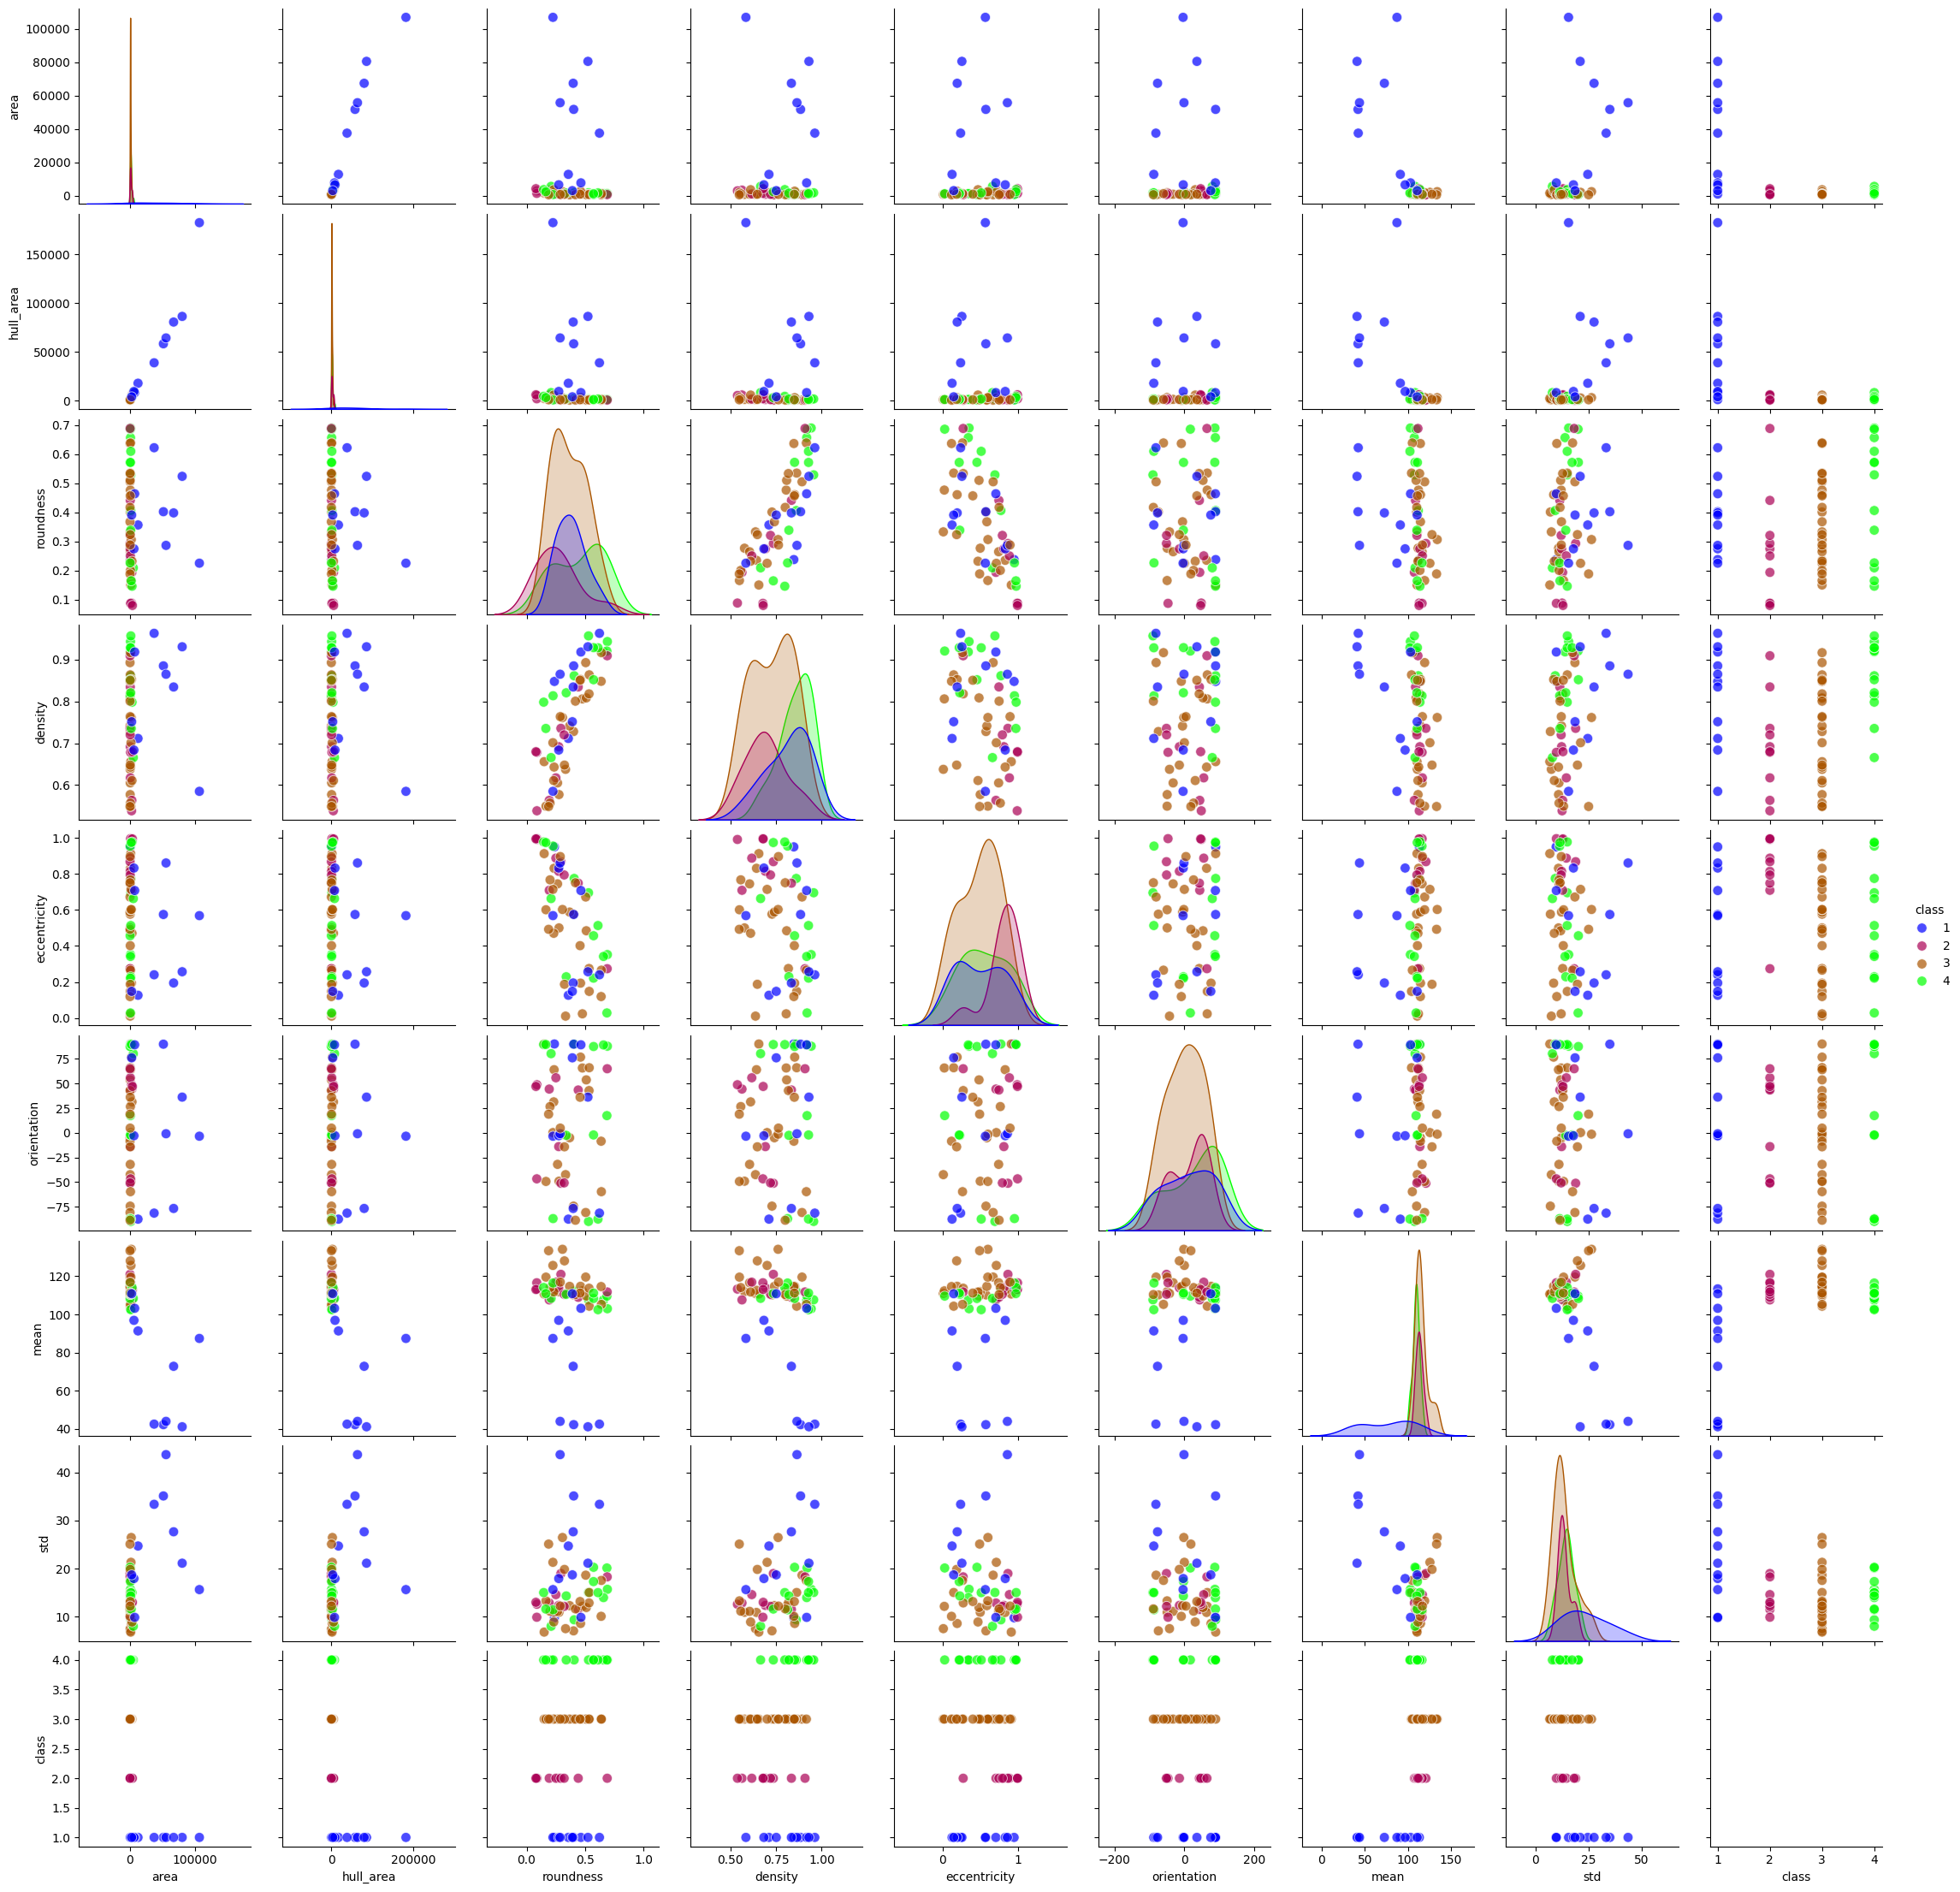

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 

spalten = ['area', 'hull_area', 'roundness', 'density',
           'eccentricity', 'orientation', 'mean', 'std', 'class']
 
sns.pairplot(
    df,
    vars=spalten,
    hue="class",
    palette="brg",
    plot_kws={"s": 70, "alpha": 0.7},
)
 
plt.show()

Klassen weglassen:
- Orientation: alle Richtungen sind vertreten
- Standardabweichung: ist in allen Kombinationen zu sehr gestreut
- hull_area: ist in allen Kombinationen zu sehr gestreut, ist sehr ähnlich zur area
- roundness: ist sehr ähnlich zur density

Klassen behalten: TODO Begründung
- area
- mean
- roundness
- density


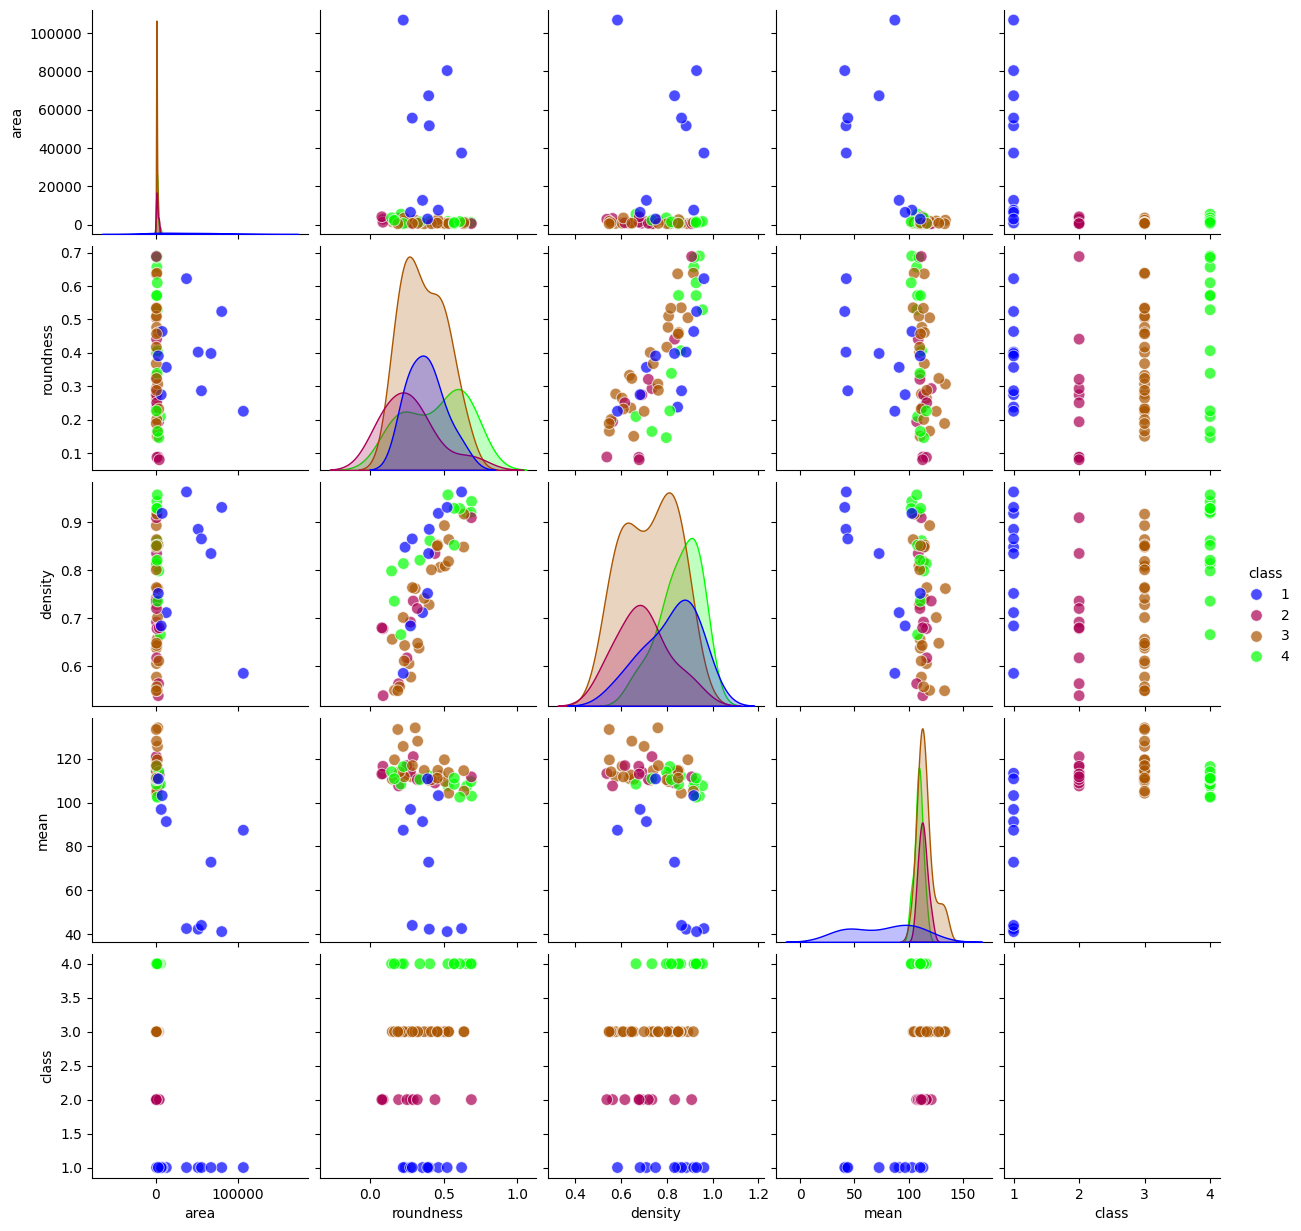

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
 

spalten = ['area', 'roundness', 'density', 'mean', 'class']
 
sns.pairplot(
    df,
    vars=spalten,
    hue="class",
    palette="brg",
    plot_kws={"s": 70, "alpha": 0.7},
)
 
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = df[['area', 'roundness', 'density', 'mean']].values
y = df['class'].values

# Normalization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Shuffling
np.random.seed(42)
rand = np.random.permutation(len(x))

x = x[rand]
y = y[rand]

# Splitting
split = int(len(x)*0.6)
x_train = x[:split]
y_train = y[:split]

x_val = x[split:]
y_val = y[split:]


In [91]:
import sklearn.metrics as mt

def acc(y_pred, y, label):
    return np.mean((y_pred == label) == (y == label))

def recall(y_pred, y, label):
    return sum((y == label) & (y_pred == label)) / sum(y == label)

def precision(y_pred, y, label):   
    return sum((y == label) & (y_pred == label)) / sum(y_pred == label)

def predict_baseline(x):
    return np.full(len(x), 3) # immer Shunts

def confusion_matrix(y_pred, y):
    cm = np.zeros((4, 4), dtype=int)
    for i in range(len(y_pred)):
        cm[y[i]-1][y_pred[i]-1] += 1
    return cm

def overall_accuracy(y_pred, y):
    cm = confusion_matrix(y_pred, y)
    sum = 0
    for i in range(4):
        sum += cm[i][i]

    return sum / len(y)


def evaluate(y_pred, y): 
    print("Accuracy Dark Area: ", acc(y_pred, y, 1))
    print("Accuracy Crack: ", acc(y_pred, y, 2))
    print("Accuracy Shunt: ", acc(y_pred, y, 3))
    print("Accuracy Finger: ", acc(y_pred, y, 4))

    print("Recall Dark Area: ", recall(y_pred, y, 1))
    print("Recall Crack: ", recall(y_pred, y, 2))
    print("Recall Shunt: ", recall(y_pred, y, 3)) 
    print("Recall Finger: ", recall(y_pred, y, 4))
    print("sklearn Recall:", mt.recall_score(y, y_pred, average=None))

    print("Precision Dark Area: ", precision(y_pred, y, 1))
    print("Precision Crack: ", precision(y_pred, y, 2))
    print("Precision Shunt: ", precision(y_pred, y, 3))
    print("Precision Finger: ", precision(y_pred, y, 4))
    print("sklearn Precision:", mt.precision_score(y, y_pred, average=None))

    print("Overall Accuracy: ", overall_accuracy(y_pred, y))
    print("sklearn Accuracy:", mt.accuracy_score(y, y_pred))

    print("Confusion Matrix:")
    display(pd.DataFrame(confusion_matrix(y_pred, y),
                     index=['True Dark Area', 'True Crack', 'True Shunt', 'True Finger'],
                     columns=['Pred Dark Area', 'Pred Crack', 'Pred Shunt', 'Pred Finger']))

    
baseline_acc = overall_accuracy(predict_baseline(x_val), y_val)

print(f"Baseline Accuracy: {baseline_acc*100:.2f}%")

Baseline Accuracy: 29.17%


### 5.4.6 k-Nearest Neighbour

In [92]:
k = 2

def predict_k_nearest(x):
    distances = []
    for i in range(x_train.shape[0]):
        distances.append(manhatten_distance(x_train[i], x, y_train[i]))

    distances.sort()
    neighbors = distances[:k]
    return max(set(neighbors), key=neighbors.count)[1]

def manhatten_distance(punkt_1, punkt_2, label):
    return (np.sum(np.abs(punkt_1 - punkt_2)), label)


predictions = []
for i in range(len(x_val)):
    predictions.append(predict_k_nearest(x_val[i]))

predictions = np.array(predictions)
evaluate(predictions, y_val)


Accuracy Dark Area:  0.9166666666666666
Accuracy Crack:  0.8333333333333334
Accuracy Shunt:  0.7083333333333334
Accuracy Finger:  0.7083333333333334
Recall Dark Area:  0.5
Recall Crack:  0.42857142857142855
Recall Shunt:  0.7142857142857143
Recall Finger:  0.6666666666666666
sklearn Recall: [0.5        0.42857143 0.71428571 0.66666667]
Precision Dark Area:  1.0
Precision Crack:  1.0
Precision Shunt:  0.5
Precision Finger:  0.4444444444444444
sklearn Precision: [1.         1.         0.5        0.44444444]
Overall Accuracy:  0.5833333333333334
sklearn Accuracy: 0.5833333333333334
Confusion Matrix:


Pred Dark Area  Pred Crack  Pred Shunt  Pred Finger
True Dark Area               2           0           0            2
True Crack                   0           3           3            1
True Shunt                   0           0           5            2
True Finger                  0           0           2            4

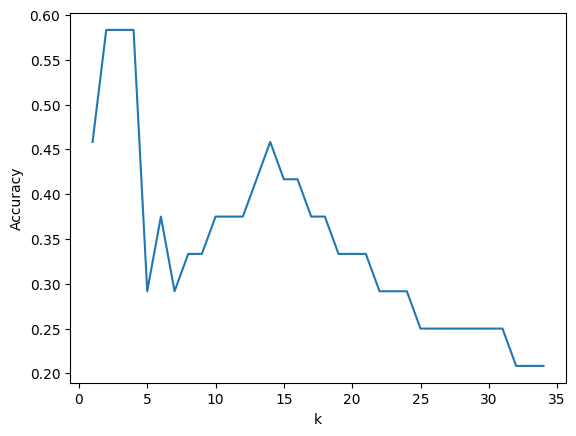

Best k: 2


In [93]:
# Hyperparameter Tuning k
accu = []
for k in range(1, x_train.shape[0]):
    predictions = []
    for i in range(len(x_val)):
        predictions.append(predict_k_nearest(x_val[i]))
    predictions = np.array(predictions)
    accu.append(overall_accuracy(predictions, y_val))

plt.plot(np.arange(1, len(accu)+1), accu)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()
print("Best k:", np.argmax(accu) + 1)
    

### 5.4.7 Teilaufgabe Support Vector Machine (SVM)
Es wird ein nichtlinearer Kernel verwendet, da dadurch eine lineare Trennung durch Ebenen ermöglicht wird.


In [ ]:
from sklearn.svm import SVC

def svm_pred(x, cost, degree):
    svm = SVC(kernel='poly', C=cost, degree=degree, gamma=1)
    svm.fit(x_train, y_train)
    return svm.predict(x)


evaluate(svm_pred(x_val, 100, 2), y_val)

Accuracy Dark Area:  0.9583333333333334
Accuracy Crack:  0.75
Accuracy Shunt:  0.625
Accuracy Finger:  0.75
Recall Dark Area:  0.75
Recall Crack:  0.14285714285714285
Recall Shunt:  0.5714285714285714
Recall Finger:  0.8333333333333334
sklearn Recall: [0.75       0.14285714 0.57142857 0.83333333]
Precision Dark Area:  1.0
Precision Crack:  1.0
Precision Shunt:  0.4
Precision Finger:  0.5
sklearn Precision: [1.  1.  0.4 0.5]
Overall Accuracy:  0.5416666666666666
sklearn Accuracy: 0.5416666666666666
Confusion Matrix:


Pred Dark Area  Pred Crack  Pred Shunt  Pred Finger
True Dark Area               3           0           1            0
True Crack                   0           1           4            2
True Shunt                   0           0           4            3
True Finger                  0           0           1            5

In [45]:
# Hyperparameter Tuning SVM
accu_map = np.zeros((3, 3), dtype=float)
for i, cost in enumerate([1, 10, 100]):
    for j, degree in enumerate([2, 3, 4]):
        y_pred = svm_pred(x_val, cost, degree)
        accu_map[i][j] = overall_accuracy(y_pred, y_val)

display(pd.DataFrame(accu_map,
             index=['C=1', 'C=10', 'C=100'],
             columns=['Degree=2', 'Degree=3', 'Degree=4']))

Degree=2  Degree=3  Degree=4
C=1    0.333333  0.416667  0.416667
C=10   0.416667  0.458333  0.416667
C=100  0.541667  0.458333  0.500000

### 5.4.8 Teilaufgabe Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(x, depth):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    return dt.predict(x)

evaluate(decision_tree(x_val, 6), y_val)

Accuracy Dark Area:  0.875
Accuracy Crack:  0.625
Accuracy Shunt:  0.5
Accuracy Finger:  0.5833333333333334
Recall Dark Area:  0.25
Recall Crack:  0.0
Recall Shunt:  0.5714285714285714
Recall Finger:  0.3333333333333333
sklearn Recall: [0.25       0.         0.57142857 0.33333333]
Precision Dark Area:  1.0
Precision Crack:  0.0
Precision Shunt:  0.3076923076923077
Precision Finger:  0.25
sklearn Precision: [1.         0.         0.30769231 0.25      ]
Overall Accuracy:  0.2916666666666667
sklearn Accuracy: 0.2916666666666667
Confusion Matrix:


Pred Dark Area  Pred Crack  Pred Shunt  Pred Finger
True Dark Area               1           0           0            3
True Crack                   0           0           6            1
True Shunt                   0           1           4            2
True Finger                  0           1           3            2

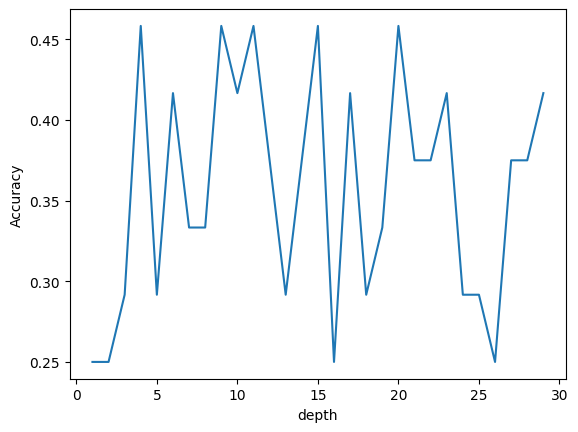

Best depth: 4


In [86]:
# Hyperparameter Tuning depth
accu = []
for depth in range(1, 30):
    accu.append(overall_accuracy(decision_tree(x_val, depth), y_val))

plt.plot(np.arange(1, len(accu)+1), accu)
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()
print("Best depth:", np.argmax(accu) + 1)

TODO: Also nach 6 hat er alles auswendig gelernt (merkt man, wenn man die Trainingsdaten verwendet `accu.append(overall_accuracy(decision_tree(x_train, depth), y_train))`). Mit den Validierungsdaten kommen komischerweise bei jeder Ausführung andere Werte raus...